## Import TensorFlow and other usful modul if requierd

In [1]:
import tensorflow as tf
print(tf.__version__)
import random as rd

2.17.0


## Create our data

### Prepare the date for ML

1. Get or create the data
2. Clean the data (not the cas here)
3. Split into:
  - training set
  - validation set
  - test set

(4. visualize the date)

**Note** in this example, no need for the validation set as the size of the data set is not big.

In [2]:

# generate a simple relationship between our feature (X) and labels (y)
X = tf.range(-100,100,2)
y = X + 10
X.shape, y.shape,

# Generate a way to shuffle data while keeping the correspondance between features (X) and labels(y)
feature_list = list()
label_list = list()
for num in X:
  feature_list.append(num.numpy()) # the .numpy() method transform the tensor into numpy data.
  label = num+10 # relation between our data
  label_list.append(label.numpy())

correspondance = list(zip(feature_list, label_list))
shuffled_list = rd.sample(correspondance, len(correspondance)) # the sample() method shuffles the list.


Now that we have successfully preseverd all the correspondance, we can rebuild our original data before visualizing where are the training and test sets respectively

In [3]:
X_shuffled = list()
y_shuffled = list()
for feature, label in shuffled_list:
  X_shuffled.append(feature)
  y_shuffled.append(label)

X_new = tf.constant(X_shuffled)
y_new = tf.constant(y_shuffled)

X_new.shape, y_new.shape

(TensorShape([100]), TensorShape([100]))

In [4]:
# Split into training (~80%) and test set (~20%)
split = int(0.8*len(X_new))
X_train, y_train = X_new[:split], y_new[:split]
X_test, y_test = X_new[split:], y_new[split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(80, 80, 20, 20)

In [5]:
X_test.shape

TensorShape([20])

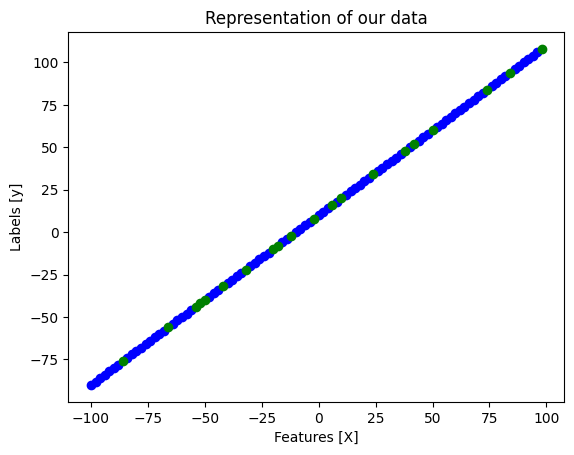

In [6]:

# Plot the data (to check if nothing went wrong)
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train, c="blue")
plt.scatter(X_test, y_test, c="green")
plt.xlabel("Features [X]")
plt.ylabel("Labels [y]")
plt.title("Representation of our data")
plt.show()

So we can see above that we have a random way of selecting the training data (in blue) that will be passed to the model and the test data (in green). This guarantee that we will not overfit the model to the training data.

**Note** - Usually, we need to split the data and label without keeping the order of how the are gathered in the original set. This is what we did above

 Indeed, this might lead to train the model such as it would be to particularize to the training set and not general enough.

Ok so now we have our data that is ready and cleaned (though it was not really necessary to clean something 😅)

We can keep going by building our model

## Building our model

here we will build a simple model and we will successively improve it to showcase the process of building a model using TensorFlow

In [7]:
tf.random.set_seed(42)
# 1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # single output neurons since to one input (X) we want to guess an output (y)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(x=tf.expand_dims(X_train, axis=-1), y=y_train, epochs=5, verbose=0)

In [8]:
y_preds = model.predict(tf.constant([17.0]))
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[15.808184]], dtype=float32)

In [13]:
X_train.shape

TensorShape([80])

In [17]:
tf.random.set_seed(42)
#1. Create a model
model1_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

#2. Compile a model
model1_1.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])
#3. fit the model
model1_1.fit(X_train, y_train, epochs=5, verbose=False)

In [18]:
y_preds1_1 = model1_1.predict(tf.constant([17.]))
y_preds1_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[15.753402]], dtype=float32)

## Improving the model

The way we can immprove the models are:

- Increase the number of epchos: allows the algorithm to search for longer
- Make our neural network more complexe: increase layers and #neurons
- change the optimizer
- Tweak the hyperparameters of the optimizer
  - activation function
  - learning rate, etc.
- change the loss function (sometimes the loss function is not adapted to the problem we are trying to solve !)

### Increase the number of epochs

In [ ]:
# let increase the number of epochs. Let's rebuild our model:
tf.random.set_seed(42)
# 1. Build the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model2.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100, verbose=0)

In [ ]:
y_preds2 = model2.predict(tf.constant([17.0]))
y_preds2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[21.749548]], dtype=float32)

### Complexify our Neural Network

In [ ]:
# Let's change the configuration of our NN
tf.random.set_seed(42)
#1. Build the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
#3. Fit the model
model3.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=0)

In [ ]:
y_preds3 = model3.predict(tf.constant([17.0]))
y_preds3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[6.3719916]], dtype=float32)

### Change the optimizer

In [ ]:
tf.random.set_seed(42)
# 1. Build the model
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])
#3. Fit the model
model4.fit(tf.expand_dims(X_train, axis=1),y_train, epochs=100, verbose=0)

In [ ]:
y_pred4 = model4.predict(tf.constant([17.0]))
y_pred4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[26.889063]], dtype=float32)

Now we can see that we get quiet close to what we expected with a value that our model never saw before. But we can still try to improve it !

let's first get a glance at the summary of our model ! using `model.summary()`


In [ ]:
# summary
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,505 (240.26 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,004 (160.18 KB)

In [ ]:
y_pred_final = model4.predict(X_test)
y_pred_final, y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


(array([[-42.453114],
        [ 17.844425],
        [ 54.022957],
        [-66.57213 ],
        [-74.6118  ],
        [-38.433273],
        [-70.591965],
        [102.26098 ],
        [ 80.151886],
        [-50.492786],
        [-30.393608],
        [-16.32418 ],
        [-24.363855],
        [-22.353933],
        [ 74.12213 ],
        [ 29.903933],
        [ -2.254755],
        [-88.68123 ],
        [ 82.161804],
        [ 21.86426 ]], dtype=float32),
 <tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([-42,  18,  54, -66, -74, -38, -70, 102,  80, -50, -30, -16, -24,
        -22,  74,  30,  -2, -88,  82,  22], dtype=int32)>)

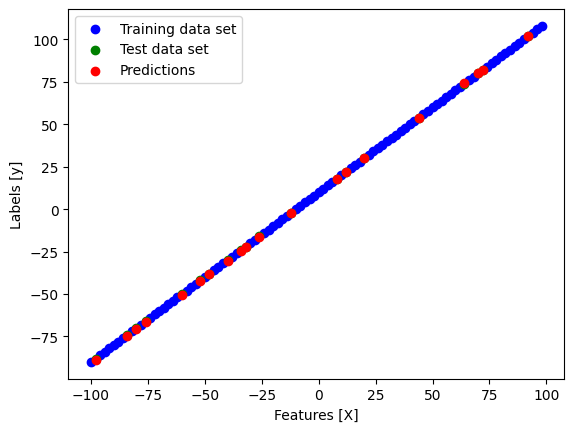

In [ ]:
# visualize the prediction with respect to the truth label
plt.figure()
plt.scatter(X_train, y_train, c="blue",label="Training data set")
plt.scatter(X_test, y_test, c="green", label="Test data set")
plt.scatter(X_test,y_pred_final, c="red",label="Predictions")
plt.xlabel("Features [X]")
plt.ylabel("Labels [y]")
plt.legend()
plt.show()

Ok so now, we have a way to visualy evaluate our model. But there are bretter ways:
- Mean Absolute Error (MAE)
- Mean Square Error (MSE)

In [ ]:
y_pred_final.shape, y_test.shape

((20, 1), TensorShape([20]))

In [ ]:
# Evaluate MAS ans MSE
def mae_mse(y_true, y_pred, metric="mae"):
  """
  Compute the mae by default or mse otherwise
  """
  if metric == "mae":
    return tf.keras.losses.mae(y_true, tf.squeeze(y_pred))
  return tf.keras.losses.mse(y_true, tf.squeeze(y_pred))

print("MAE:", mae_mse(y_test, y_pred_final))
print("MSE:", mae_mse(y_test,y_pred_final,metric="mse"))

MAE: tf.Tensor(0.3316884, shape=(), dtype=float32)
MSE: tf.Tensor(0.14596215, shape=(), dtype=float32)


Why use the `tf.squeeze()`?
well because if we take a look at the size of `y_test`and `y_pred`they are note the same !

we can see that the y_pred has one dimension more than y_test so we need to squeeze it.

## Save and load a model

Let's say that you are quiet happy with your model and you want to save it and load it later. Well you can do it with the following instructions.

**Note**: there are two format files you can use in TensorFlow:

- format files (using keras)
- hdf5 (more suitable for interfacing with other apps or for large model)

In [ ]:
# Save using file format (keras)
model4.save("saved_model_keras.keras")

In [ ]:
# Save using hdf5 format
tf.keras.models.save_model(model4,"saved_model_hdf5.hdf5")

In [ ]:
# load file and check predictions:
loaded_model_keras = tf.keras.models.load_model("saved_model_keras.keras")
loaded_model_hdf5 = tf.keras.models.load_model("saved_model_hdf5.hdf5")

In [ ]:
# making predictions
loaded_model_keras.predict(X_test)
loaded_model_hdf5.predict(X_test) , y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


(array([[-42.453114],
        [ 17.844425],
        [ 54.022957],
        [-66.57213 ],
        [-74.6118  ],
        [-38.433273],
        [-70.591965],
        [102.26098 ],
        [ 80.151886],
        [-50.492786],
        [-30.393608],
        [-16.32418 ],
        [-24.363855],
        [-22.353933],
        [ 74.12213 ],
        [ 29.903933],
        [ -2.254755],
        [-88.68123 ],
        [ 82.161804],
        [ 21.86426 ]], dtype=float32),
 <tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([-42,  18,  54, -66, -74, -38, -70, 102,  80, -50, -30, -16, -24,
        -22,  74,  30,  -2, -88,  82,  22], dtype=int32)>)

In [19]:
# copy this files to your google drive
!cp "/content/saved_model_keras.keras" "/content/drive/MyDrive/Colab Notebooks"


cp: cannot stat '/content/saved_model_keras.keras': No such file or directory
